# X+Y-Z= ?

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('data.01.csv')

In [3]:
data.head()

,a,b,c,answer
0,1,5,1,5
1,3,10,4,9
2,5,15,7,13
3,8,20,10,18
4,10,25,15,20


In [4]:
data.tail()

,a,b,c,answer
15,40,81,63,58
16,44,88,71,61
17,50,89,76,63
18,50,93,80,63
19,55,97,85,67


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       20 non-null     int64
 1   b       20 non-null     int64
 2   c       20 non-null     int64
 3   answer  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [6]:
data.columns

Index(['a', 'b', 'c', 'answer'], dtype='object')

In [7]:
data.shape

(20, 4)

## EDA

In [8]:
import matplotlib.pyplot as plt

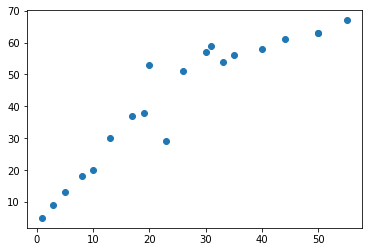

In [9]:
plt.scatter(data['a'],data['answer'])

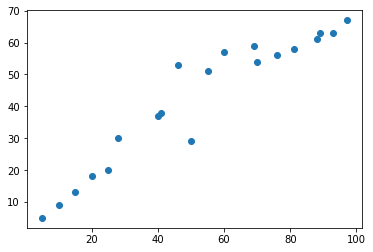

In [10]:
plt.scatter(data['b'],data['answer'])

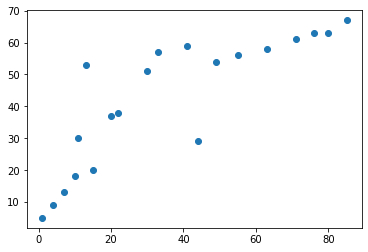

In [11]:
plt.scatter(data['c'],data['answer'])

## Model Training

In [12]:
x=data[['a','b','c']]
y=data['answer']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.33, random_state=42)

In [15]:
x_train

,a,b,c
3,8,20,10
18,50,93,80
16,44,88,71
13,33,70,49
2,5,15,7
9,23,50,44
19,55,97,85
4,10,25,15
12,31,69,41
7,19,41,22


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.score(x_train,y_train)

1.0

In [20]:
model.score(x_test,y_test)

1.0

## Compare the result

In [21]:
y_pred=model.predict(x_test)
y_pred

array([ 5., 63., 58.,  9., 53., 30., 57.])

In [22]:
y_test

0      5
17    63
15    58
1      9
8     53
5     30
11    57
Name: answer, dtype: int64

In [23]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df


,Actual,Prediction
0,5,5.0
17,63,63.0
15,58,58.0
1,9,9.0
8,53,53.0
5,30,30.0
11,57,57.0


In [24]:
model.predict([[20,100,99]])

C:\Users\Laptop Outlet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.])

## Save the model

In [25]:
import joblib 

In [26]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [27]:
model=joblib.load('model_joblib')

In [28]:
model.predict([[1000,99,10]])

C:\Users\Laptop Outlet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1089.])

## Train and save all data

In [29]:
x=data[['a','b','c']]
y=data['answer']

In [30]:
model=LinearRegression()



In [31]:
model.fit(x,y)


LinearRegression()

In [32]:
import joblib
joblib.dump(model,'model_joblib')
model=joblib.load('model_joblib')
model.predict([[23,45,50]])


C:\Users\Laptop Outlet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.])

## GUI

In [33]:
def show_entry_fields():
  p1=float(e1.get())
  p2=float(e2.get())
  p3=float(e3.get())   

  model=joblib.load('model_joblib')
  result=model.predict([[p1,p2,p3]])
  Label(master,text='sum is = ').grid(row=5)
  Label(master,text= result).grid(row=6)
  print("sum is", result)

In [34]:
from tkinter import *
import joblib

master=Tk()
master.title("(a+b-c=??) using ML")
label= Label(master, text="a+b-c=?",bg='black',fg='white').grid(row=0,columnspan=2)


In [35]:
 Label(master,text="Enter First Number").grid(row=1)
 Label(master,text="Enter Second Number").grid(row=2)
 Label(master,text="Enter Third Number").grid(row=3)
 e1=Entry(master)
 e2=Entry(master)
 e3=Entry(master)
 e1.grid(row=1,column=1)
 e2.grid(row=2,column=1)
 e3.grid(row=3,column=1)
 Button(master,text='predict',command=show_entry_fields).grid()
 mainloop()
    
